## Introduction:
This notebook corresponds to Chapter 11. The primary objective of this notebook is to provide practical code examples that complement the explanations given in the chapter. Here, we will focus on analyzing the features of a graph and the basic graph properties.  
​
This code has been tested in Google Colaboratory. 
​
#### Installing Dependencies
​
Install the necessary libraries to execute the notebook. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from matplotlib.pyplot import figure

import networkx as nx
import numpy as np

from operator import itemgetter
import community.community_louvain as community

#### Edges

Upload the dataset composed by transactions carried out by addresses related with Binance and OpenSea. 

In [2]:
df= pd.read_csv ('/content/joint_binance_opensea.csv')
df.head()

,from_address,to_address
0,0xe50a5145483c22242be79bb231963b21cfd94041,0x781fc3524d4d1737a9bd1f9657a61ecfe25af443
1,0xe50a5145483c22242be79bb231963b21cfd94041,0x5bb526afb1d90b40073b7c304bab083fd9957255
2,0x1e426f05b76dfbd78ec9a238118f54c74b7d2a89,0x437911c3f83d5bd0b1340bbd0f0f606625154f30
3,0x02535a353d2285fb8ee620db50472d3b08fff560,0xd4074c1e48e11615fd1cfe8cbe691f5ab944aaa6
4,0x02535a353d2285fb8ee620db50472d3b08fff560,0xb3a2b86c8695122e059174a7f518fcc21a93fde2


Create a network graph using the data from the dataframe. The columns identify the source and target for the graph. 

In [3]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df, 'from_address', 'to_address')

#### Analyzing Network Graph
Print out the number of nodes, edges, and average degree of the graph created with the NetworkX library. This will provide an overview of the graph and allow us to analyze the structure of the network.

In [4]:
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Number of nodes 1058
Number of edges 1584
Average degree 2.9943289224952743


#### Visualizing Network Graph

Create a visualization of the graph created with the NetworkX library. This allows us to see the structure of the network and identify any patterns or clusters. 

The code will create a figure with a size of 20x15, and use the `spring_layout` function to position the nodes.

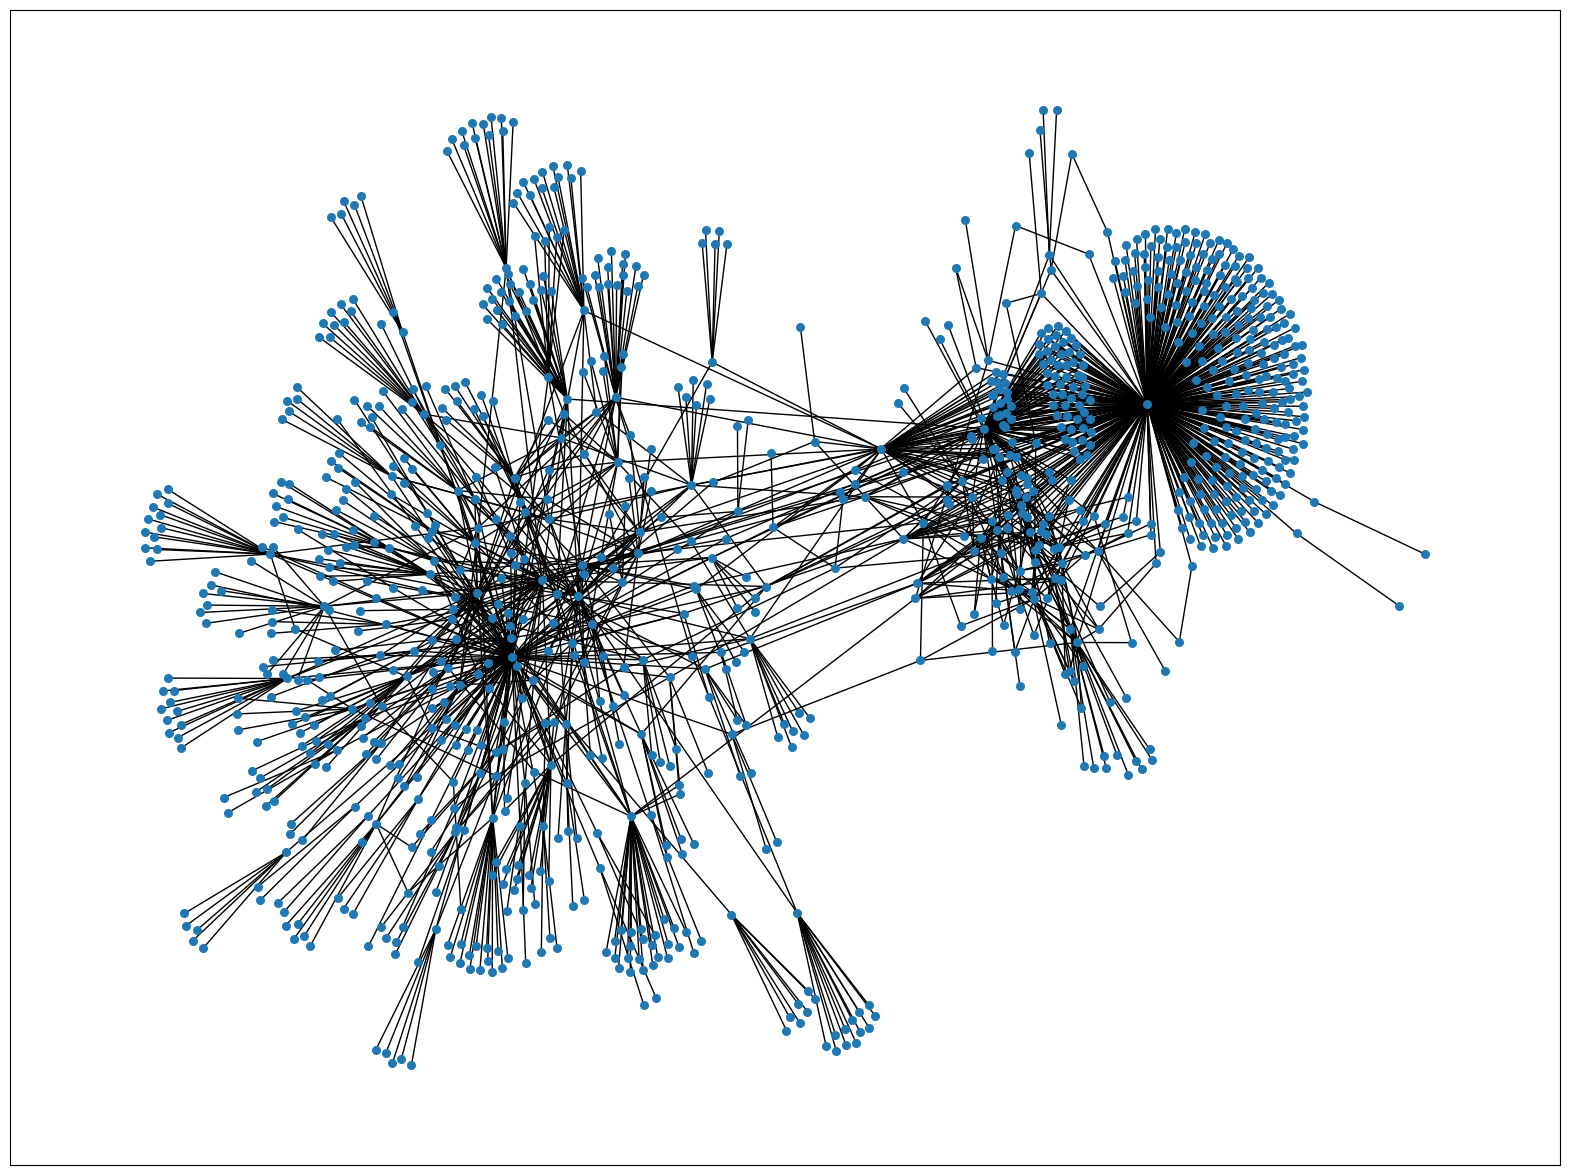

In [5]:
figure(figsize=(20, 15))
pos = nx.spring_layout(G, seed=5)  
nx.draw_networkx_nodes(G, pos, node_size=30) #
nx.draw_networkx_edges(G, pos)

#### Draw metrics

Define certain colors to customize the visualization of the graph created with the NetworkX library.

In [6]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

The function below enables us to draw the graph using the layout provided by the spring_pos parameter and also highlight the top 10 nodes according to the values in the metric dictionary.

In [7]:
def draw_metric(G, dct, spring_pos):
  """ draw the graph G using the layout spring_pos.
      The top 10 nodes w.r.t. values in the dictionary dct
      are enhanced in the visualization """
  top = 10
  max_nodes =  sorted(dct.items(), key = lambda v: -v[1])[:top]

  max_keys = [key for key,_ in max_nodes]
  max_vals = [val*300 for _, val in max_nodes]

  plt.axis("off")

  nx.draw_networkx(G,
                   pos=spring_pos,
                   cmap='Blues',
                   edge_color=default_edge_color,
                   node_color=default_node_color,
                   node_size=3,
                   alpha=0.4,
                   with_labels=False)

  nx.draw_networkx_nodes(G,
                         pos=spring_pos,
                         nodelist=max_keys,
                         node_color=enhanced_edge_color,
                         node_size=max_vals)

In [8]:
spring_pos = nx.spring_layout(G, seed=5)

### Betweenness Centrality

Calculate the betweenness centrality of the graph using the NetworkX library. The top 80 nodes will be filtered and stored in a dictionary for future use. 

In [9]:
bC = nx.betweenness_centrality(G)
np.mean(list(bC.values()))
filtered_bc = dict(sorted(bC.items(), key=itemgetter(1), reverse=True)[:80])

Visualize the betweenness centrality of the graph using the draw_metric() function.

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


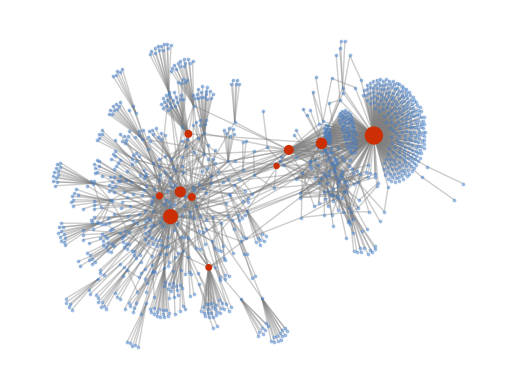

In [10]:
draw_metric(G,bC,spring_pos)

### Degree Centrality
Calculate the degree centrality of the graph using the NetworkX library. The top 80 nodes will be filtered and stored in a dictionary for future use. 

In [11]:
deg_C = nx.degree_centrality(G)
np.mean(list(deg_C.values()))
filtered_deg_C = dict(sorted(deg_C.items(), key=itemgetter(1), reverse=True)[:80])

Visualize the degree centrality of the graph using the draw_metric() function.

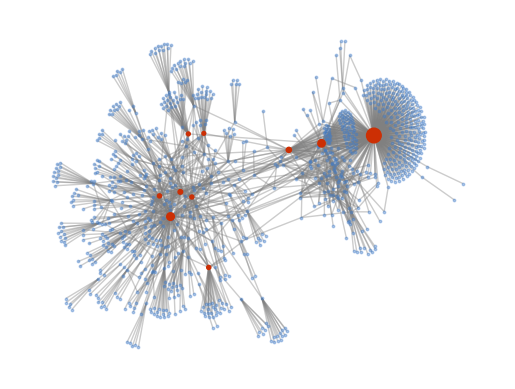

In [12]:
draw_metric(G,deg_C,spring_pos)

### Closeness Centrality
Calculate the closeness centrality of the graph using the NetworkX library. The top 80 nodes will be filtered and stored in a dictionary for future use. 

In [13]:
# closeness centrality
clos_C = nx.closeness_centrality(G)
np.mean(list(clos_C.values()))
filtered_clos_C =  dict(sorted(clos_C.items(), key=itemgetter(1), reverse=True)[:80])

Visualize the closeness centrality of the graph using the draw_metric() function.

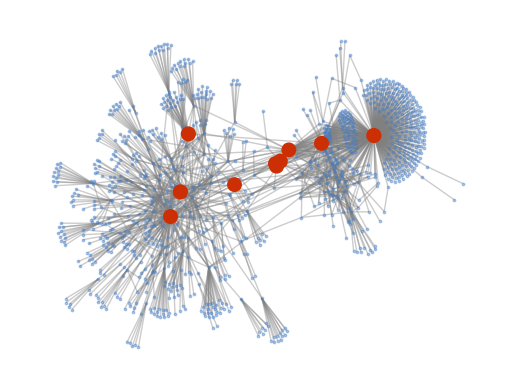

In [14]:
draw_metric(G,clos_C,spring_pos)

### PageRank
Calculate the PageRank of the graph using the NetworkX library. The top 80 nodes will be filtered and stored in a dictionary for future use. 

In [15]:
pr_C = nx.pagerank(G)
np.mean(list(pr_C.values()))
filtered_pr_C = dict(sorted(pr_C.items(), key=itemgetter(1), reverse=True)[:80])

Visualize the PageRank of the graph using the draw_metric() function.

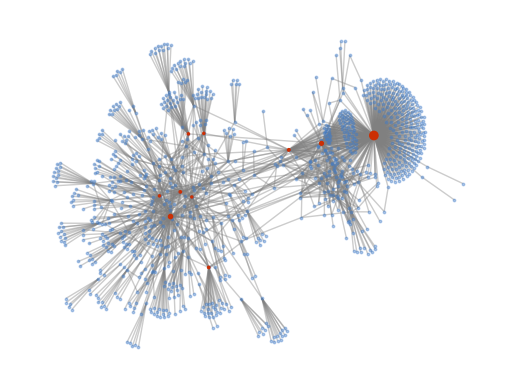

In [16]:
draw_metric(G,pr_C,spring_pos)

### Modularity
Visualize the modularity of the graph using the draw_partition() function. This will create a graph with nodes colored according to their modularity class. 

In [17]:
cols=['Id','Label','modularity_class']
partition_df=pd.read_csv ('/content/modularity2comunities.csv', usecols=cols)
partition_df.head()

,Id,Label,modularity_class
0,0xe50a5145483c22242be79bb231963b21cfd94041,0xe50a5145483c22242be79bb231963b21cfd94041,0
1,0x781fc3524d4d1737a9bd1f9657a61ecfe25af443,0x781fc3524d4d1737a9bd1f9657a61ecfe25af443,0
2,0x5bb526afb1d90b40073b7c304bab083fd9957255,0x5bb526afb1d90b40073b7c304bab083fd9957255,0
3,0x1e426f05b76dfbd78ec9a238118f54c74b7d2a89,0x1e426f05b76dfbd78ec9a238118f54c74b7d2a89,0
4,0x437911c3f83d5bd0b1340bbd0f0f606625154f30,0x437911c3f83d5bd0b1340bbd0f0f606625154f30,0


In [18]:
partition_dictionary = partition_df.query("Id != 'from_address'")
partition_dictionary = partition_dictionary.query("Id != 'to_address'")
partition_dictionary=pd.Series(partition_dictionary.modularity_class.values,index=partition_dictionary.Id).to_dict()

Create a partition from the graph G using the partition_dictionary within the `community.best_partition()` function from the python-louvain library. Assign each node in the graph to a modularity class based on the partition_dictionary. 

In [19]:
partition = community.best_partition(G, random_state=42, partition=partition_dictionary)
communities = pd.Series(partition)
communities.value_counts().sort_values(ascending=False)

0    584
1    474
dtype: int64

Create a visualization of the partition created in the previous cell. Each color represents a community.

<ipython-input-20-9e336fb55d52>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


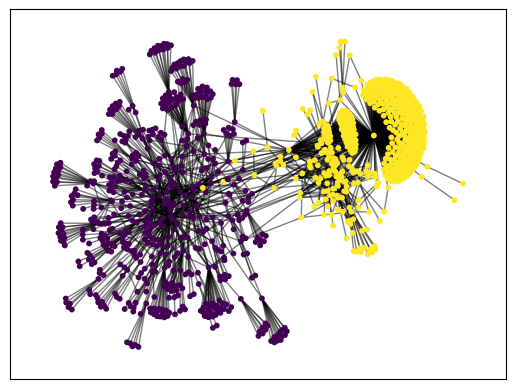

In [20]:
pos = nx.spring_layout(G, seed=5)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=10,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

###  Eigenvector Centrality

To calculate eigenvector centrality we analyze each community separately. For that purpose we need to filter the nodes depending on to which community they belong. The my_filtering_function() function will be used to filter out the nodes with a value other than 1 and create a list of binance nodes. 

In [21]:
community_value=1
def my_filtering_function(pair):
    key, value = pair
    if value == community_value:
        return True  # keep pair in the filtered dictionary
    else:
        return False  # filter pair out of the dictionary

binance_nodes_dic = dict(filter(my_filtering_function, partition.items()))
binance_nodes_list= list(binance_nodes_dic.keys())

Filter the dataframe to create a binance_nodes dataframe which will contain only the rows from df that have a from_address or to_address that is in the binance_nodes_list.

In [24]:
binance_nodes_from = df[df['from_address'].isin(binance_nodes_list)]
binance_nodes_to = df[df['to_address'].isin(binance_nodes_list)]
binance_nodes= binance_nodes_from.append (binance_nodes_to)
binance_nodes.drop_duplicates (subset=['from_address','to_address'], inplace=True)

<ipython-input-24-e55912186fa9>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  binance_nodes= binance_nodes_from.append (binance_nodes_to)


In [25]:
binance_nodes.shape

(787, 2)

### Eigenvector Centrality of Binance Network
Calculate the eigenvector centrality of the Binance network, represented by the G_binance graph. The eigenvector centrality is a measure of the influence of a node in a network, based on the number of connections it has to other nodes with high influence. 

In [26]:
G_binance = nx.Graph()
G_binance = nx.from_pandas_edgelist(binance_nodes, 'from_address', 'to_address')
e_C_binance = nx.eigenvector_centrality(G_binance, max_iter=600)
np.mean(list(e_C_binance.values()))

0.03082606065745663

Visualize the eigenvector centrality of the Binance network.

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


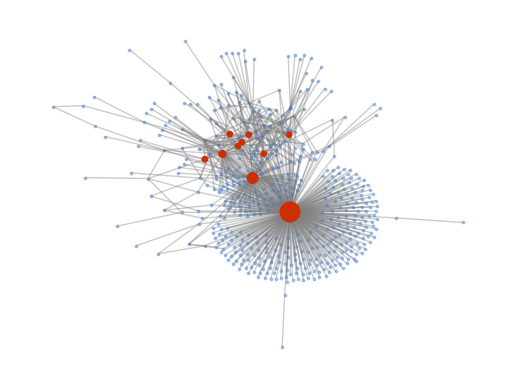

In [27]:
spring_pos_class1 = nx.spring_layout(G_binance, seed=5)
draw_metric(G_binance,e_C_binance,spring_pos_class1)

Store the top 80 nodes with the highest eigenvector centrality values for the Binance network.

In [28]:
filtered_e_C_binance = dict(sorted(e_C_binance.items(), key=itemgetter(1), reverse=True)[:80])

#### Eigenvector Centrality of OpenSea Network
Filter the dataframe to create a classe0_nodes dataframe which will contain only the rows from df that have a from_address or to_address that is `not` in the binance_nodes_list.

Calculate the eigenvector centrality of the OpenSea network, represented by the e_C_classe0 dictionary. Store the top 80 nodes with the highest eigenvector centrality values for the OpenSea network.

In [29]:
classe0_from = df[~df['from_address'].isin(binance_nodes_list)]
classe0_to = df[~df['to_address'].isin(binance_nodes_list)]
classe0_nodes= classe0_from.append (classe0_to)
classe0_nodes.drop_duplicates (subset=['from_address','to_address'], inplace=True)

G_classe0 = nx.Graph()
G_classe0 = nx.from_pandas_edgelist(classe0_nodes, 'from_address', 'to_address')
e_C_classe0 = nx.eigenvector_centrality(G_classe0, max_iter=600)
filtered_e_C_class0 = dict(sorted(e_C_classe0.items(), key=itemgetter(1), reverse=True)[:80])

<ipython-input-29-0547353cd8a1>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classe0_nodes= classe0_from.append (classe0_to)


Visualize the eigenvector centrality of the OpenSea network.

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


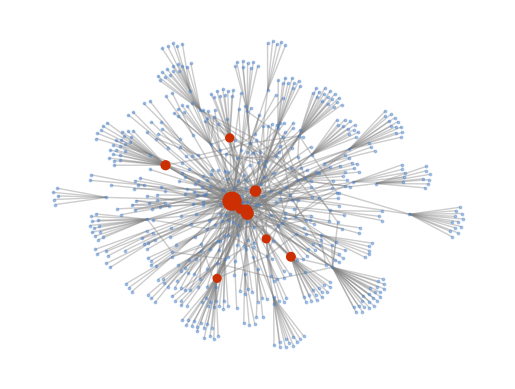

In [30]:
spring_pos_class0 = nx.spring_layout(G_classe0, seed=5)
draw_metric(G_classe0,e_C_classe0,spring_pos_class0)

#### Creating a DataFrames with top 80 influencer nodes 
Create dataframes, each containing the centrality measures for the nodes in the network. Afterwards merge them using the address as merging key. 

In [31]:
bc_df= pd.DataFrame.from_dict(filtered_bc, orient='index', columns=['betweeness_centrality'])
deg_C_df= pd.DataFrame.from_dict(filtered_deg_C, orient='index', columns=['degree'])
clos_C_df= pd.DataFrame.from_dict(filtered_clos_C, orient='index', columns=['closeness_centrality'])
pr_df= pd.DataFrame.from_dict(filtered_pr_C, orient='index', columns=['page_rank'])
class1_ev_df= pd.DataFrame.from_dict(e_C_binance, orient='index', columns=['class1_ecentrality'])
class0_ev_df= pd.DataFrame.from_dict(e_C_classe0, orient='index', columns=['class0_ecentrality'])

In [32]:
bc_df= bc_df.merge (deg_C_df, how='left', left_on=bc_df.index, right_on=deg_C_df.index)
bc_df.rename(columns={"key_0": "node"}, inplace=True)

In [33]:
bc_df= bc_df.merge (clos_C_df, how='left', left_on=bc_df.node, right_on=clos_C_df.index)
bc_df.drop (columns=['key_0'], inplace=True)
bc_df.shape

(80, 4)

In [34]:
bc_df= bc_df.merge (pr_df, how='left', left_on=bc_df.node, right_on=pr_df.index)
bc_df.drop (columns=['key_0'], inplace=True)
bc_df.shape

(80, 5)

In [35]:
bc_df= bc_df.merge (class1_ev_df, how='left', left_on=bc_df.node, right_on=class1_ev_df.index)
bc_df.drop (columns=['key_0'], inplace=True)
bc_df.shape

(80, 6)

In [36]:
bc_df= bc_df.merge (class0_ev_df, how='left', left_on=bc_df.node, right_on=class0_ev_df.index)
bc_df.drop (columns=['key_0'], inplace=True)
bc_df.shape

(80, 7)

#### Assign Community
Assign a community to each node in the dataframe using the partition dictionary calculated above. 

In [37]:
bc_df['community'] = [partition[row] for row in bc_df['node']]

The resulting dataframe looks like this

In [38]:
bc_df.head()

,node,betweeness_centrality,degree,closeness_centrality,page_rank,class1_ecentrality,class0_ecentrality,community
0,0x28c6c06298d514db089934071355e5743bf21d60,0.495882,0.370861,0.330933,0.119086,0.669655,NaN,1
1,0x7f268357a8c2552623316e2562d90e642bb538e5,0.325185,0.101230,0.317417,0.030545,0.000710,0.553669,0
2,0xdac17f958d2ee523a2206206994597c13d831ec7,0.173784,0.094607,0.319335,0.024555,0.198603,0.031272,1
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.162766,0.036897,0.330003,0.010171,0.005395,0.227218,0
4,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0.126293,0.046358,0.314396,0.011532,0.080424,0.043889,1


The resulting dataframe can be called 'influencers.csv'. This dataset will be useful in the node classification notebook. 

In [39]:
bc_df.to_csv ('influencers.csv', index = False)
from google.colab import files
#files.download("influencers.csv")